# **Pré-processamento da Base de Dados do Titanic**
Escrito por: José Brito

---

## **Objetivo**
O objetivo do trabalho é analisar uma base de dados contendo informações sobre os passageiros do RMS Titanic, utilizando técnicas de análise de dados e machine learning para dividir os passageiros e conseguir prever a sobrevivência. As características incluem atributos binários e categóricos, enquanto o atributo alvo é a sobrevivência do passageiro. O presente trabalho envolve etapas como pré-processamento dos dados, visualização, aplicação de algoritmos de classificação e avaliação dos resultados.

## **Descrição do Dataset**

O dataset do Titanic é composto por informações sobre os passageiros do RMS Titanic, que naufragou em sua viagem inaugural em 1912. As colunas principais do dataset incluem:

- **PassengerId**: Identificador único do passageiro.
- **Survived**: Indicador de sobrevivência (0 = Não, 1 = Sim).
- **Pclass**: Classe do ticket (1 = Primeira, 2 = Segunda, 3 = Terceira).
- **Name**: Nome do passageiro.
- **Sex**: Sexo do passageiro.
- **Age**: Idade do passageiro.
- **SibSp**: Número de irmãos/cônjuges a bordo.
- **Parch**: Número de pais/filhos a bordo.
- **Ticket**: Número do ticket.
- **Fare**: Tarifa paga pelo passageiro.
- **Cabin**: Número da cabine.
- **Embarked**: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

---
## 1. Importando as Bibliotecas e carregando o dataset:

- Importando as bibliotecas e carregando o dataset CSV na memória usando pandas.read_csv

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('../data/titanic.csv')

## 2. Exploração Inicial dos Dados:

- Exibindo as primeiras linhas do dataset para uma visão geral.

In [58]:
# Visualizar as primeiras linhas do dataset
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

- Obtendo as informações sobre a estrutura dos dados, verificando os tipos de dados e valores nulos.

In [59]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


- Descrevendo estatísticas básicas.

In [60]:
# Estatísticas descritivas de colunas numéricas
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

## 3. Identificando se há Valores Duplicados:

- Identificando linhas que estejam duplicadas.

In [61]:
# Verifica se há linhas duplicadas no DataFrame, mantendo todas as duplicatas
if df.duplicated(keep=False).any():
    # Se houver linhas duplicadas, identifica e armazena as duplicatas em 'duplicated_rows'
    duplicated_rows = df[df.duplicated(keep=False)]
    
    # Exibe uma mensagem indicando que há linhas duplicadas
    print("Há linhas duplicadas:")
    
    # Exibe as linhas duplicadas identificadas
    print(duplicated_rows)
else:
    # Se não houver linhas duplicadas, exibe uma mensagem indicando isso
    print("Não há linhas duplicadas.")


Não há linhas duplicadas.


## 4. Identificação e correção de Valores Faltantes:

### 4.1 Identificando colunas com valores nulos.

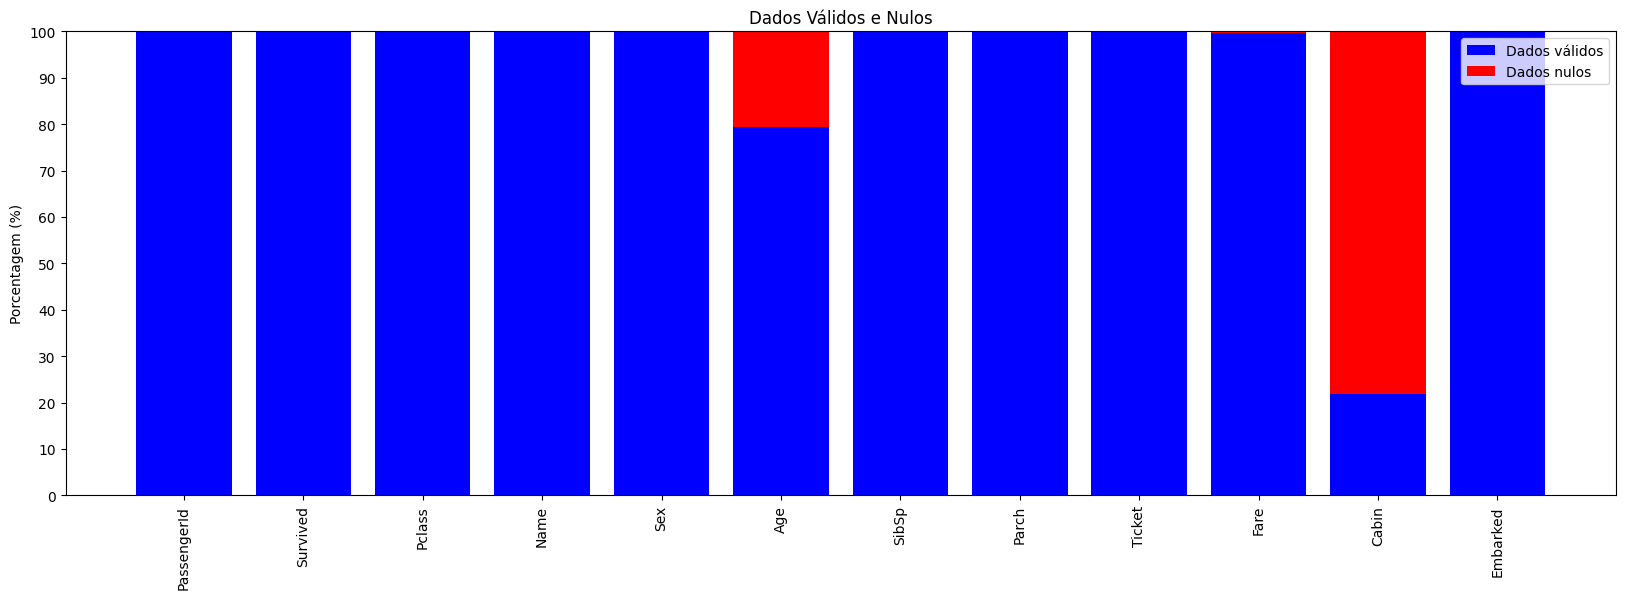

In [62]:
# Calcula a quantidade de valores ausentes em cada coluna do DataFrame
df.isna().sum()

# Calcula o número total de linhas no DataFrame
tam = len(df)

# Lista para armazenar a porcentagem de dados nulos em cada coluna
dados_nulos = []

# Lista para armazenar a porcentagem de dados válidos em cada coluna
dados_validos = []

# Itera sobre cada coluna do DataFrame
for column in df:
    # Calcula a porcentagem de valores nulos em relação ao total de linhas e a adiciona à lista 'dados_nulos'
    dados_nulos.append((df[column].isna().sum() / tam) * 100)
    
    # Calcula a porcentagem de valores válidos em relação ao total de linhas e a adiciona à lista 'dados_validos'
    dados_validos.append(100 - ((df[column].isna().sum() / tam) * 100))

# Cria uma figura para o gráfico com tamanho personalizado
plt.figure(figsize=(20, 8))

# Plota as barras representando os dados válidos para cada coluna, com a cor azul
plt.bar(df.columns.tolist(), dados_validos, color='b', label='Dados válidos')

# Plota as barras representando os dados nulos para cada coluna, com a cor vermelha, empilhando-as sobre as barras de dados válidos
plt.bar(df.columns.tolist(), dados_nulos, bottom=dados_validos, color='r', label='Dados nulos')

# Adiciona um título ao gráfico
plt.title("Dados Válidos e Nulos")

# Adiciona uma legenda ao gráfico
plt.legend()

# Rotaciona os rótulos do eixo x em 90 graus para melhorar a legibilidade
plt.xticks(rotation=90)

# Define os intervalos dos rótulos do eixo y de 0 a 100 com incremento de 10
plt.yticks(range(0, 101, 10))

# Adiciona um rótulo ao eixo y
plt.ylabel('Porcentagem (%)')

# Ajusta a posição dos subplots para evitar sobreposição de rótulos
plt.subplots_adjust(bottom=0.3)

# Exibe o gráfico
plt.show()


In [63]:
# Calcula o número total de linhas no DataFrame
tam = len(df)

# Itera sobre cada coluna do DataFrame
for column in df:
    # Calcula o número de valores nulos na coluna
    nulos = df[column].isna().sum()
    
    # Calcula a porcentagem de dados válidos em relação ao total de linhas e a armazena em 'x'
    x = 1 - nulos / tam   
    
    # Exibe a porcentagem de dados válidos para a coluna atual
    print("Dados válidos de", column, ":", format(x * 100, '.2f'), "%" )

Dados válidos de PassengerId : 100.00 %
Dados válidos de Survived : 100.00 %
Dados válidos de Pclass : 100.00 %
Dados válidos de Name : 100.00 %
Dados válidos de Sex : 100.00 %
Dados válidos de Age : 79.43 %
Dados válidos de SibSp : 100.00 %
Dados válidos de Parch : 100.00 %
Dados válidos de Ticket : 100.00 %
Dados válidos de Fare : 99.76 %
Dados válidos de Cabin : 21.77 %
Dados válidos de Embarked : 100.00 %


### 4.2 Preenchendo os dados faltantes.
- Preenche os valores nulos com a moda para colunas com mais de 90% de dados válidos
- Preenche os valores nulos com forward fill para colunas com 70-90% de dados válidos
- Remove as colunas que têm menos de 70% de dados válidos

In [64]:
# Copiando o dataframe para fazer comparações mais tarde
df_com_missing_data = df.copy()

# Calcula o número total de linhas no DataFrame
tam = len(df)

# Listas para armazenar as colunas que precisam ser removidas ou preenchidas
cols_to_drop = []
cols_to_ffill = []
cols_to_fillna_mode = []

# Itera sobre cada coluna do DataFrame
for column in df.columns:
    # Calcula o número de valores nulos na coluna
    nulos = df[column].isna().sum()
    
    # Calcula a porcentagem de dados válidos em relação ao total de linhas
    x = 1 - nulos / tam

    # Verifica se a porcentagem de dados válidos é menor que 0.7
    if x < 0.7:
        # Se a porcentagem for menor que 0.7, adiciona a coluna à lista de remoção
        cols_to_drop.append(column)
    # Verifica se a porcentagem de dados válidos está entre 0.7 e 0.9
    elif 0.7 <= x < 0.9:
        # Se a porcentagem estiver nesse intervalo, adiciona a coluna à lista de forward fill
        cols_to_ffill.append(column)
    # Caso contrário, ou seja, se a porcentagem for maior ou igual a 0.9
    elif x >= 0.9:
        # Adiciona a coluna à lista de preenchimento com a moda
        cols_to_fillna_mode.append(column)

# Remove as colunas que têm menos de 70% de dados válidos
df.drop(columns=cols_to_drop, inplace=True)

# Preenche os valores nulos com forward fill para colunas com 70-90% de dados válidos
for column in cols_to_ffill:
    df[column] = df[column].ffill()

# Preenche os valores nulos com a moda para colunas com mais de 90% de dados válidos
for column in cols_to_fillna_mode:
    moda = df[column].mode()[0]
    df[column] = df[column].fillna(moda)


# Verifica o resultado

# Calcula o número total de linhas no DataFrame
tam = len(df)

# Itera sobre cada coluna do DataFrame
for column in df:
    # Calcula o número de valores nulos na coluna
    nulos = df[column].isna().sum()
    
    # Calcula a porcentagem de dados válidos em relação ao total de linhas e a armazena em 'x'
    x = 1 - nulos / tam   
    
    # Exibe a porcentagem de dados válidos para a coluna atual
    print("Dados válidos de", column, ":", format(x * 100, '.2f'), "%" )



Dados válidos de PassengerId : 100.00 %
Dados válidos de Survived : 100.00 %
Dados válidos de Pclass : 100.00 %
Dados válidos de Name : 100.00 %
Dados válidos de Sex : 100.00 %
Dados válidos de Age : 100.00 %
Dados válidos de SibSp : 100.00 %
Dados válidos de Parch : 100.00 %
Dados válidos de Ticket : 100.00 %
Dados válidos de Fare : 100.00 %
Dados válidos de Embarked : 100.00 %


### 4.3 Comparação antes e depois da correção
Comparar as estatísticas descritivas antes e depois de corrigir valores ausentes é crucial para garantir a integridade dos dados. Essa comparação ajuda a identificar possíveis distorções causadas pela imputação de valores, assegurando que as características dos dados, como média e desvio padrão, não sejam significativamente alteradas. Assim, podemos garantir que as análises subsequentes sejam confiáveis e representativas da realidade, evitando conclusões errôneas e mantendo a qualidade dos dados.

In [65]:
# Ajeitando para podermos manipular
describe_df = df.describe()
describe_df_com_missing_data = df_com_missing_data.describe()

# Convertendo os dataframes de descrição em um formato adequado para comparação
describe_diff = describe_df - describe_df_com_missing_data

# Calculando a porcentagem de diferença
percentage_diff = (describe_diff.abs() / describe_df.abs()) * 100

# Exibindo as diferenças percentuais
print("Diferença percentual entre os dataframes:")
print(percentage_diff)

# Calculando a similaridade média
similarity_percentage = 100 - percentage_diff.mean().mean()
print(f"Os dataframes são {similarity_percentage:.2f}% similares.")

Diferença percentual entre os dataframes:
       PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare
count          0.0       0.0     0.0  20.574163    0.0    0.0  0.239234
mean           0.0       0.0     0.0   0.489927    0.0    0.0  0.187545
std            0.0       0.0     0.0   1.981992    0.0    0.0  0.090286
min            0.0       NaN     0.0   0.000000    NaN    NaN       NaN
25%            0.0       NaN     0.0   4.545455    NaN    NaN  0.000000
50%            0.0       NaN     0.0   0.000000    NaN    NaN  0.000000
75%            0.0       0.0     0.0   0.000000    0.0    NaN  0.089366
max            0.0       0.0     0.0   0.000000    0.0    0.0  0.000000
Os dataframes são 99.49% similares.


## 5. Transformando dados categóricos em numéricos:
Transformar dados categóricos em numéricos é crucial para a compatibilidade com a maioria dos algoritmos de aprendizado de máquina, que trabalham com dados numéricos. Essa transformação melhora a performance do modelo, reduz a complexidade computacional e facilita a aplicação de operações matemáticas e estatísticas essenciais para o aprendizado.
- Coluna "Sex"

In [66]:
# Usando a função map para substituir 'male' por 1 e 'female' por 0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  47.0      1      0   
2                     Myles, Mr. Thomas Francis    1  62.0      0      0   
3                              Wirz, Mr. Albert    1  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S

## 6. Retirando colunas desnecessárias
Retirar colunas desnecessárias, ou irrelevantes, ajuda a reduzir ruído, prevenir overfitting e melhorar a eficiência computacional do modelo. Ao focar apenas nas características mais importantes, a seleção de características resulta em modelos mais simples e interpretáveis, o que é fundamental em áreas que exigem explicações claras das previsões do modelo. Técnicas como análise de correlação, ANOVA e modelos de seleção de características garantem que apenas as variáveis mais relevantes sejam mantidas, melhorando a precisão e a interpretabilidade dos modelos de aprendizado de máquina.

In [67]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'])

## 7. Exportando em csv:

In [68]:
df.to_csv('../data/titanic_preprocessed.csv', index=False)